## Filters 

- High pass filter
- Band pass filter
- Band stop filter

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/e/ec/Bandform_template.svg/1920px-Bandform_template.svg.png"/> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from lib.signalprocessingmd import fourierTransform,getScaledDomain
from lib.plotmd import plotVector,plot2D

In [2]:
def plotHelper(fw,Fw,fscaled,filter_name):
    plt.figure(figsize=(12, 4), dpi=80)
    plt.subplot(121)
    plotVector(fw,"{} / time domain ".format(filter_name),"n","f(n)")
    plt.subplot(122)
    plot2D(fscaled,Fw,"{} / frequency domain".format(filter_name),"n","F(n)")
    plt.show()

In [3]:
from lib.filtersmd import lpf# Low pass filter
# High pass filter implementation
def hpf(fc,m,dt):
    hpw=np.zeros(2*m+1)
    lpw=lpf(fc,m,dt)
    for k in range(2*m+1):
        if k==m:
            hpw[k]=1-lpw[k]
        else:
            hpw[k]=-lpw[k]
    return hpw
# Band pass filter implementation
def bpf(fc1,fc2,m,dt):
    lpw1=lpf(fc1,m,dt)
    lpw2=lpf(fc2,m,dt)
    return lpw2-lpw1
# Band stop filter implementation
def bsf(fc1,fc2,m,dt):
    bsw=np.zeros(2*m+1)
    lpw1=lpf(fc1,m,dt)
    lpw2=lpf(fc2,m,dt)
    for k in range(2*m+1):
        if k==m:
            bsw[k]=1+lpw1[k]-lpw2[k]
        else:
            bsw[k]=lpw1[k]-lpw2[k]
    return bsw

In [4]:
# control hyperparameters
dt=0.001   # sampling period
m=128      # m samples to form the right part of the filter , because the filter is symmetric
N=2*m+1   # NF is the total size of the filter
fscaled=getScaledDomain(dt,N)[:N/2]  #scaled domain for the filters spectur

A <B>Low-pass filter (LPF) </B>  passes signals with a frequency lower than a certain cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency

<IPython.core.display.Javascript object>


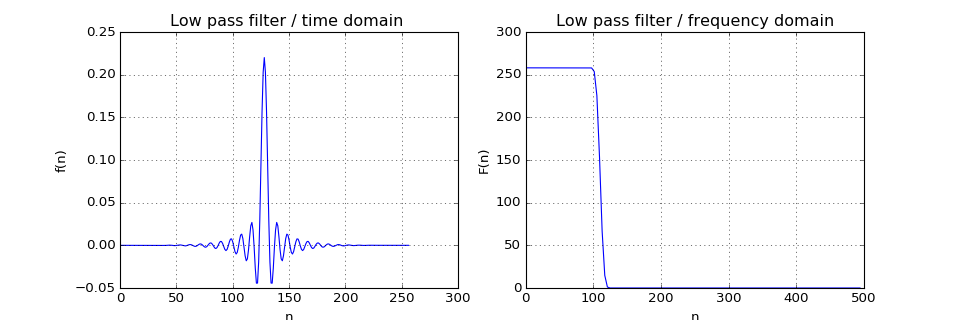

In [5]:
fout=110
lpw=lpf(fout,m,dt)
_,Cn_lpw=fourierTransform(lpw)
Cn_lpw=Cn_lpw[:N/2]*(N+1)
plotHelper(lpw,Cn_lpw,fscaled,"Low pass filter")

A <B>high-pass filter (HPF) </B>  passes signals with a frequency higher than a certain cutoff frequency and attenuates signals with frequencies lower than the cutoff frequency

<IPython.core.display.Javascript object>


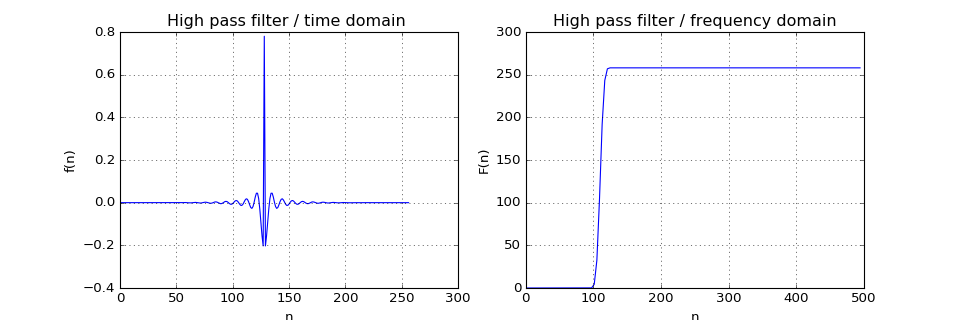

In [6]:
fc=110
hpw=hpf(fc,m,dt)
_,Cn_hpw=fourierTransform(hpw)
Cn_hpw=Cn_hpw[:N/2]*(N+1)

plotHelper(hpw,Cn_hpw,fscaled,"High pass filter")

A <B>band-pass filter (also bandpass filter, BPF) </B> passes frequencies within a certain range and rejects (attenuates) frequencies outside that range.

<IPython.core.display.Javascript object>


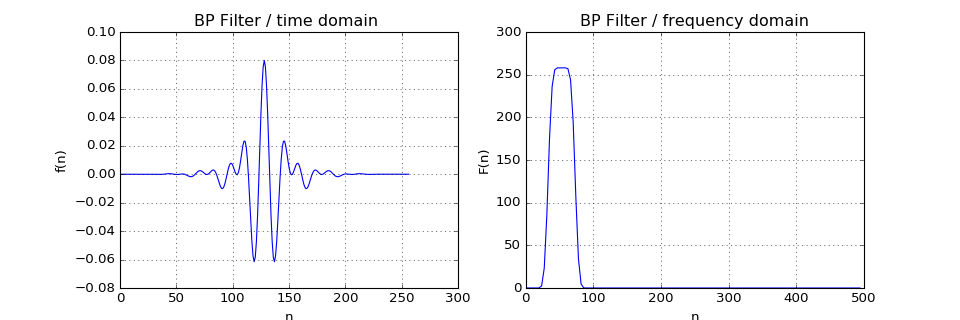

In [7]:
fc1=33
fc2=73
bpw=bpf(fc1,fc2,m,dt)
_,Cn_bpw=fourierTransform(bpw)
Cn_bpw=Cn_bpw[:N/2]*(N+1)

plotHelper(bpw,Cn_bpw,fscaled,"BP Filter")

a <B>band-stop filter</B> or <B>band-rejection filter</B> is a filter that passes most frequencies unaltered, but attenuates those in a specific range to very low levels. It is the opposite of a band-pass filter.

<IPython.core.display.Javascript object>


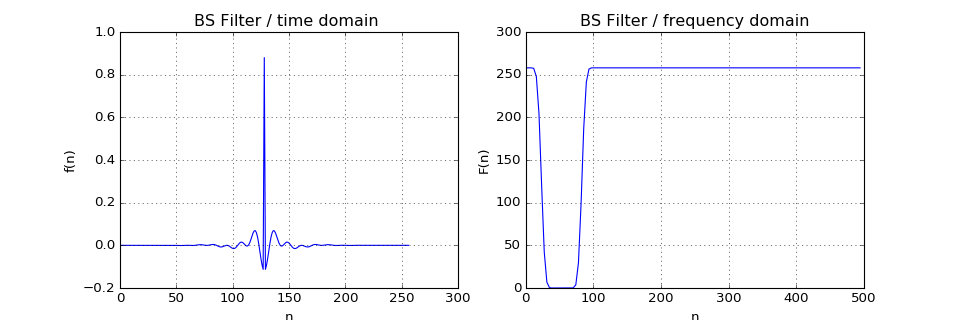

In [8]:
fc1=23
fc2=83
bsw=bsf(fc1,fc2,m,dt)
_,Cn_bsw=fourierTransform(bsw)
Cn_bsw=Cn_bsw[:N/2]*(N+1)

plotHelper(bsw,Cn_bsw,fscaled,"BS Filter")